In [34]:
import pandas as pd
import os

ot_odr_filename = os.path.join(".", "OT_ODR.csv.bz2")
ot_odr_df = pd.read_csv(ot_odr_filename, compression="bz2", sep=";")
longueur_ot_odr_df = len(ot_odr_df)

equipements_filename = os.path.join(".", 'EQUIPEMENTS.csv')
equipements_df = pd.read_csv(equipements_filename, sep=";")


In [35]:
equipements_df.tail()


,EQU_ID,MODELE,CONSTRUCTEUR,MOTEUR
4882,E00271009,MD023,C007,MT021
4883,E00341892,MD063,C007,MT023
4884,E00331551,MD005,C000,MT040
4885,E00373890,MD021,C011,MT0-1
4886,E00365136,MD032,C006,MT016


In [36]:
ot_odr_df.tail()

,OT_ID,ODR_ID,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,EQU_ID,DATE_OT,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE
506553,OT000405952,OM000506539,REMPLACEMENT D'UN FEU DE RECUL,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00040793,2019-09-30 20:38:09,296005.373397,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/EXTERIEUR/DROIT,CASSE,L0283
506554,OT000405953,OM000506546,REMPLACEMENT D'UN ECLAIRAGE EXT,MECANIQUE,0.75,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00274690,2019-09-30 21:21:20,153050.080050,ECLAIRAGE FEUX EXTERIEURS,ARRIERE/LATERAL,CASSE,L0116
506555,OT000405954,OM000506536,REMPLACEMENT D'UN PASSE SANS CONTACT,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,PASSE SANS CONTACT,E00256452,2019-09-30 21:39:29,175063.182439,AVTT,AVANT/PORTE,INTERMITTENT,L0134
506556,OT000405955,OM000506545,REMPLACEMENT D'UNE LAMPE DE FEU DE GABARIT,ELECTRICITE,0.04,EQUIPEMENT ELECTRIQUE,ECLAIRAGE-SIGNALISATION,ECLAIRAGE-SIGNALISATION EXT,E00006122,2019-09-30 21:55:28,437053.614263,ECLAIRAGE FEUX EXTERIEURS,LATERAL/HAUT/GAUCHE,NE FONCTIONNE PAS,L0270
506557,OT000405956,OM000506547,REMPLACEMENT DE LA CASSETTE ENCREUSE D'UN VALI...,EQUIPEMENT EMBARQUE,0.03,EQUIPEMENT EMBARQUE,TELEBILLETIQUE,VALIDEUR MAGNETIQUE,E00315330,2019-09-30 23:43:42,83269.095630,AVTT,POSTE CONDUITE/AVANT,NE FONCTIONNE PAS,L0047


In [37]:
ot_odr_df['SIG_ORGANE'].value_counts()

SIG_ORGANE
ECLAIRAGE FEUX EXTERIEURS    189559
CLIGNOTANTS/ DETRESSE         38986
PARE-CHOCS                    33191
RETROVISEUR                   25005
PORTE                         23043
                              ...  
TACHYGRAPHE                       2
LUBRIMATIC                        1
COLMATAGE.F.AIR                   1
PILE BTSAM                        1
ISSUE SEC.                        1
Name: count, Length: 116, dtype: int64

In [38]:
var_cat = ['ODR_LIBELLE', 'TYPE_TRAVAIL',
           'SYSTEM_N1', 'SYSTEM_N2', 'SYSTEM_N3', 
           'SIG_ORGANE', 'SIG_CONTEXTE', 'SIG_OBS', 'LIGNE']
for var in var_cat:
    ot_odr_df[var] = ot_odr_df[var].astype('category')

ot_odr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506558 entries, 0 to 506557
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   OT_ID          506558 non-null  object  
 1   ODR_ID         506558 non-null  object  
 2   ODR_LIBELLE    506558 non-null  category
 3   TYPE_TRAVAIL   506558 non-null  category
 4   DUREE_TRAVAIL  506558 non-null  float64 
 5   SYSTEM_N1      506558 non-null  category
 6   SYSTEM_N2      506558 non-null  category
 7   SYSTEM_N3      506558 non-null  category
 8   EQU_ID         506558 non-null  object  
 9   DATE_OT        506558 non-null  object  
 10  KILOMETRAGE    506557 non-null  float64 
 11  SIG_ORGANE     506558 non-null  category
 12  SIG_CONTEXTE   506558 non-null  category
 13  SIG_OBS        506558 non-null  category
 14  LIGNE          506558 non-null  category
dtypes: category(9), float64(2), object(4)
memory usage: 29.7+ MB


### PyAgrum

In [39]:
!pip install pyAgrum
import pyAgrum as gum

rb_projet =  gum.BayesNet("Réseau bayésien")

## Création du noeud de SIG_ORGANE

In [40]:

SIG_ORGANE_ELEMENT = ot_odr_df['SIG_ORGANE'].value_counts()

va_SIG_ORGANE = gum.LabelizedVariable("SIG_ORGANE", "SIG_ORGANE", len(SIG_ORGANE_ELEMENT))

i = 0
for liste in ot_odr_df['SIG_ORGANE'].unique():
    va_SIG_ORGANE.changeLabel(i,liste)
    i += 1


In [41]:

SIG_SYSTEM_N1 = ot_odr_df['SYSTEM_N1'].value_counts()

va_SYSTEM_N1 = gum.LabelizedVariable("SYSTEM_N1", "SYSTEM_N1", len(SIG_SYSTEM_N1))

i = 0
for liste in ot_odr_df['SYSTEM_N1'].unique():
    va_SYSTEM_N1.changeLabel(i,liste)
    i += 1


In [42]:
for va in [va_SIG_ORGANE,va_SYSTEM_N1]:
    rb_projet.add(va)

In [43]:
rb_projet.addArc("SIG_ORGANE","SYSTEM_N1")

# Affichage

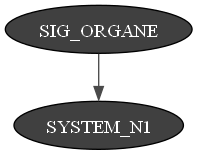

In [44]:
import pyAgrum.lib.ipython as gnb

gnb.showBN(rb_projet)

## Probabilité pour SIG_ORGANE

In [45]:
def Create_Probabilite(df,element,all_element):
    longueur_df = len(df)
    count_element = []
    for liste in all_element:
        if liste in df[element].unique():
            count_element.append(len(df.loc[df[element] == liste]) / longueur_df)
        else:
            count_element.append(0)
    return count_element

In [46]:


rb_projet.cpt("SIG_ORGANE")[:] = Create_Probabilite(ot_odr_df,"SIG_ORGANE",ot_odr_df["SIG_ORGANE"].unique())

rb_projet.cpt("SIG_ORGANE")


(pyAgrum.Potential<double>@0000023292C15F40) 
  SIG_ORGANE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

## Probabilité pour SYSTEM_N1

In [47]:
for liste_SIG in ot_odr_df['SIG_ORGANE'].unique():
    count_SYSTEM_N1 = []
    ot_odf_SIG_ORANE = ot_odr_df.loc[ot_odr_df['SIG_ORGANE'] == liste_SIG]
    rb_projet.cpt("SYSTEM_N1")[{"SIG_ORGANE":liste_SIG}] = Create_Probabilite(ot_odf_SIG_ORANE,"SYSTEM_N1",ot_odr_df["SYSTEM_N1"].unique())

rb_projet.cpt("SYSTEM_N1")

(pyAgrum.Potential<double>@00000232B5CFFB20) 
      ||  SYSTEM_N1                                                                                        |
SIG_OR||EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|EQUIPEMEN|DIVERS   |
------||---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
GLACE/|| 0.9122  | 0.0648  | 0.0090  | 0.0008  | 0.0057  | 0.0000  | 0.0025  | 0.0008  | 0.0041  | 0.0000  |
KLAXON|| 0.1170  | 0.8578  | 0.0023  | 0.0000  | 0.0000  | 0.0069  | 0.0023  | 0.0000  | 0.0138  | 0.0000  |
VOITUR|| 0.2984  | 0.1254  | 0.1062  | 0.0326  | 0.0268  | 0.0905  | 0.2126  | 0.0179  | 0.0893  | 0.0004  |
PARE-C|| 0.7831  | 0.1978  | 0.0111  | 0.0004  | 0.0004  | 0.0002  | 0.0058  | 0.0002  | 0.0011  | 0.0000  |
SECURI|| 0.7463  | 0.1915  | 0.0000  | 0.0323  | 0.0025  | 0.0075  | 0.0050  | 0.0050  | 0.0100  | 0.0000  |
VOLANT|| 0.3020  | 0.0503  | 0.5361  | 0.0000  | 0.0041  | 0.0340  | 0.0122  | 0.0

In [48]:
ot_odf_SIG_ORANE.tail()

,OT_ID,ODR_ID,ODR_LIBELLE,TYPE_TRAVAIL,DUREE_TRAVAIL,SYSTEM_N1,SYSTEM_N2,SYSTEM_N3,EQU_ID,DATE_OT,KILOMETRAGE,SIG_ORGANE,SIG_CONTEXTE,SIG_OBS,LIGNE
370118,OT000298752,OM000370745,REMPLACEMENT DU COMPTEUR DE VITESSE,ELECTRICITE,0.5,EQUIPEMENT ELECTRIQUE,INDICATEUR,INDICATEUR DE VITESSE,E00006076,2018-04-03 15:41:45,289549.415881,TACHYGRAPHE,TABLEAU DE BORD,INTERMITTENT,L0158
403241,OT000324747,OM000403053,REMPLACEMENT D'UN ECRAN LCD,MECANIQUE,2.0,EQUIPEMENT ELECTRIQUE,INDICATEUR,ORDINATEUR DE BORD,E00006179,2018-08-25 01:00:53,454669.743071,TACHYGRAPHE,TABLEAU DE BORD/CENTRE/CENTRALE/AVANT,FONCTIONNE MAL,L0212
